In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names




['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = data.target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)



In [4]:
from sklearn.neural_network import MLPClassifier  
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer # Vectorisation of words into vectors

mlp = make_pipeline(TfidfVectorizer(),  MLPClassifier(hidden_layer_sizes=(10), max_iter=1000,solver = 'lbfgs'))

mlp.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=10, max_iter=1000,
                               solver='lbfgs'))])

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       319
           1       0.72      0.62      0.67       389
           2       0.58      0.69      0.63       394
           3       0.58      0.67      0.62       392
           4       0.70      0.76      0.73       385
           5       0.77      0.69      0.73       395
           6       0.71      0.78      0.74       390
           7       0.69      0.88      0.77       396
           8       0.78      0.90      0.84       398
           9       0.80      0.81      0.81       397
          10       0.92      0.92      0.92       399
          11       0.86      0.86      0.86       396
          12       0.63      0.63      0.63       393
          13       0.87      0.56      0.68       396
          14       0.90      0.80      0.85       394
          15       0.79      0.84      0.82       398
          16       0.69      0.81      0.75       364
          17       0.96    

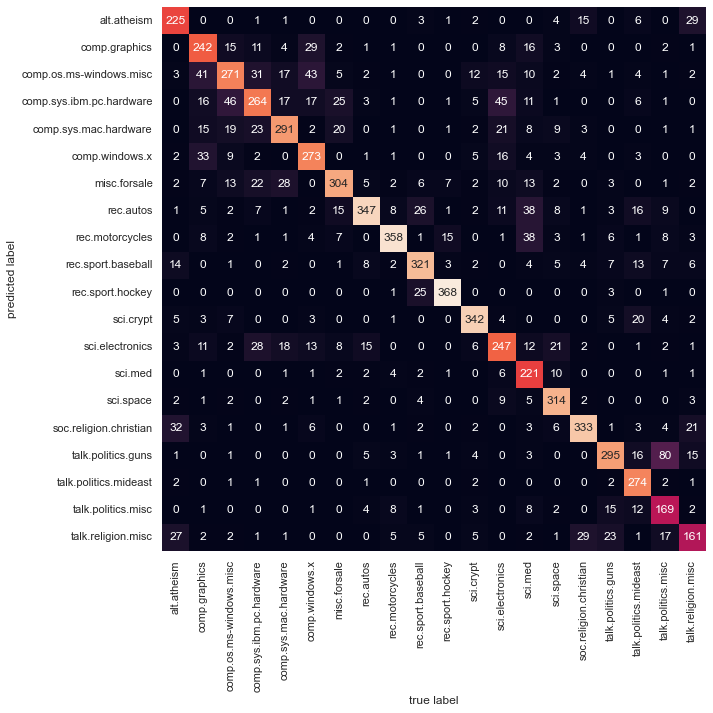

In [5]:
labels_mlp = mlp.predict(test.data)


from sklearn.metrics import confusion_matrix, classification_report

fig, ax = plt.subplots(figsize=(10,10)) 

mat = confusion_matrix(test.target, labels_mlp)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Confusion matrix

print(classification_report(test.target, labels_mlp))  



In [6]:
def predict_category(s, train=train, model=mlp):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [20]:
# Type your own words
# For example

A= 'Samsung' # New data for classification


predict_category(A)


'comp.os.ms-windows.misc'